### import pandas as pd

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
import time

# Import Pre-Processed Data
The CSV file that will be used here was from the previous notebook for pre-processing data

In [2]:
df = pd.read_csv(r"C:\Users\Neil Garcia\randomforest\dataCIC\preprocessdata++.csv")

In [3]:
df

,Full request URI,Label,HasDirectoryTraversal,HasFilePathManipulation,HasNullBytePoisoning,HasWrapperAbuse,HasDoubleEncoding,URILength,SpecialCharCount,PathDepth,TokenCount,HasAttackVector
0,http://thenextweb.com/in/2015/03/24/india-u-tu...,0,0,0,0,0,0,89,19,8,3,0
1,http://slickdeals.net/forums/forumdisplay.php?...,0,0,0,0,0,0,88,11,4,11,0
2,dvwa/vulnerabilities/fi/%c0%2e%c0%2e%c1%9c%c0%...,1,0,1,0,1,1,93,23,4,41,1
3,http://www.piutetrailrvpark.com/wp-content/the...,0,0,0,0,0,0,92,15,7,5,0
4,dvwa/vulnerabilities/fi/%252e%252e%c1%pc%252e%...,1,0,1,0,1,1,103,21,4,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12999,http://cox.com/residential/support/alert.cox?a...,0,0,0,0,0,0,89,13,5,5,0
13000,/mutillidae/index.php?page=%2e%2e%5c%2e%2e%5c%...,1,0,1,1,1,1,129,32,2,59,1
13001,/mutillidae/index.php?page=%2e%2e%2e%5c%2e%2e%...,1,0,1,0,1,1,126,34,2,63,1
13002,dvwa/vulnerabilities/fi/.?%f0%80%80%af.?%f0%80...,1,0,0,0,0,1,80,27,4,38,1


-----------------------

# Ensuring rows that contain null are removed
Removal of Full request URI column will be removed as several features were extracted and converted into a numeric representation in either boolean or integer value

In [4]:
# Drop rows that are null
df.dropna

# Drop also the Full request URI since strings cannot be processed by RF 
df = df.drop(labels=['Full request URI'], axis=1)

Count of Attacks(1): 6501
Count of Normal(0): 6503


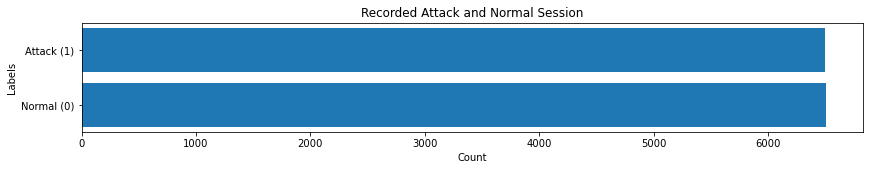

In [22]:
# Check if the ratio of attack(1) and normal(0) entry on the dataset needs to be balanced from one way to another
value_counts = df['Label'].value_counts()

print("Count of Attacks(1):", value_counts[1]) 
print("Count of Normal(0):", value_counts[0])

# Create a bar chart
plt.figure(figsize=(14, 2))

plt.barh(['Normal (0)', 'Attack (1)'], [value_counts[0], value_counts[1]])
plt.xlabel('Count')
plt.ylabel('Labels')
plt.title('Recorded Attack and Normal Session')

# Customize y-axis labels
plt.show()

# Defining Independent and Dependent Variables
Separating the targeted variable which is the 'Label' column from the other features(column) in the dataframe. Making the Y variable as the pinnacle definition, if considering all the columns from 'X', can dictate if it is an attack or not.

In [23]:
# define dependent variable
Y = df['Label'].values
Y=Y.astype('int')

# define independent variables
X = df.drop(labels=['Label'], axis=1)

In [7]:
# install this package to process the balancing of dataset
pip install --user imbalanced-learn

SyntaxError: invalid syntax (Temp/ipykernel_11112/359234195.py, line 2)

# SMOTENN 
A technique to use when the dataset is imbalance so that the dataset to be used in training the model can provide a quality detection rate. SMOTE-ENN is a combination of over and under sampling technqiue to ensure the dataset is in a fair and balanced playing field

#### Validating if the playing field of data is fair between attack or normal

# Split the dataset
The 80% of the dataset will be used for training the model and 20% will be left for testing the data

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

# Check metrics and Compare to other Algorithms

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Classifier', 'Train Score', 'Test Score', 'Cross-Val Mean Accuracy', 'Cross-Val Std Deviation', 'Fit Time'])

# Define a list of classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("MLP Classifier", MLPClassifier()),
    ("SVM Classifier", SVC()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Logistic Regression", LogisticRegression())
]

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=["Classifier", "Train Score", "Test Score", "Cross-Val Mean Accuracy", "Cross-Val Std Deviation", "Fit Time"])

# Loop through each classifier and evaluate its performance
for clf_name, clf in classifiers:
    print(f"Evaluating {clf_name}...")

    # Perform cross-validation and obtain accuracy scores
    kf = KFold(n_splits=20, shuffle=True, random_state=42)  # Adjust the number of splits as needed
    cross_val_scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')

    # Fit the model
    start_time = time.time()
    clf.fit(x_train, y_train)
    end_time = time.time()
    fit_time = end_time - start_time

    # Get performance metrics
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    test_score = np.mean(test_score) * 100

    # Get cross-validation mean accuracy and standard deviation
    cross_val_mean_accuracy = np.mean(cross_val_scores) * 100
    cross_val_std_deviation = np.std(cross_val_scores)

    # Add the results to the DataFrame
    results = results.append({
        'Classifier': clf_name,
        'Train Score': train_score,
        'Test Score': test_score,
        'Cross-Val Mean Accuracy': cross_val_mean_accuracy,
        'Cross-Val Std Deviation': cross_val_std_deviation,
        'Fit Time': fit_time,}, ignore_index=True)

Evaluating Random Forest...
Evaluating Gaussian Naive Bayes...
Evaluating Quadratic Discriminant Analysis...


C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Neil Garcia\Ap

C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\

Evaluating Decision Tree...
Evaluating AdaBoost...
Evaluating MLP Classifier...


C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluating SVM Classifier...
Evaluating K-Nearest Neighbors...
Evaluating Logistic Regression...


C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Neil Garcia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

# Test Model with Hyperparameter Tuning

In [26]:
# Create the Random Forest model with hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=80, bootstrap=True, random_state=42)

# Perform cross-validation and obtain accuracy scores
kf = KFold(n_splits=20, shuffle=True, random_state=42)  # Adjust the number of splits as needed
cross_val_scores = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')

# Fit the model
start_time = time.time()
model.fit(x_train, y_train)
end_time = time.time()
fit_time = end_time - start_time

# Get performance metrics
train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test) * 100  # Multiply by 100 for percentage


# Get cross-validation mean accuracy and standard deviation
cross_val_mean_accuracy = np.mean(cross_val_scores) * 100
cross_val_std_deviation = np.std(cross_val_scores)

# Get prediction on the test set
y_pred = model.predict(x_test)


# Print performance metrics
print("Train Score: {:.5f}, Test Score: {:.5f}".format(train_score, test_score))
print("Cross-Val Mean Accuracy (%): {:.5f}".format(cross_val_mean_accuracy))
print("Cross-Val Standard Deviation: {:.5f}".format(cross_val_std_deviation))
print("Fit Time: {:.5f} seconds".format(fit_time))


# Add the results to the DataFrame (assuming you have a DataFrame named 'results')
results = results.append({
        'Classifier': 'Random Forest Tuned',
        'Train Score': train_score,
        'Test Score': test_score,
        'Cross-Val Mean Accuracy': cross_val_mean_accuracy,
        'Cross-Val Std Deviation': cross_val_std_deviation,
        'Fit Time': fit_time,}, ignore_index=True)

Train Score: 1.00000, Test Score: 99.96098
Cross-Val Mean Accuracy (%): 99.98051
Cross-Val Standard Deviation: 0.00058
Fit Time: 1.98354 seconds


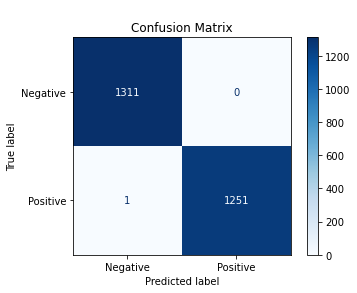

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap with integer values
disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Negative', 'Positive'])

# Use values_format to display values as integers
disp.plot(cmap=plt.cm.Blues, values_format="d")  # "d" specifies integer format
plt.title('\nConfusion Matrix')
plt.show()

In [28]:
# Compare other algorithms
results

,Classifier,Train Score,Test Score,Cross-Val Mean Accuracy,Cross-Val Std Deviation,Fit Time
0,Random Forest,1.000000,99.882950,99.970760,0.000696,0.399182
1,Gaussian Naive Bayes,0.896770,89.972688,89.677030,0.008392,0.003005
2,Quadratic Discriminant Analysis,0.496439,51.150995,49.643602,0.018409,0.032104
3,Decision Tree,1.000000,99.960983,99.970722,0.000697,0.007612
4,AdaBoost,0.991999,99.180648,99.199980,0.003696,0.316648
5,MLP Classifier,0.991316,98.946547,98.477914,0.007595,7.000206
6,SVM Classifier,0.949654,94.966836,94.926406,0.009456,1.462990
7,K-Nearest Neighbors,0.999122,99.765899,99.560890,0.002751,0.015447
8,Logistic Regression,0.943312,95.357004,94.282141,0.008831,0.060322
9,Random Forest Tuned,1.000000,99.960983,99.980507,0.000585,1.983540


In [29]:
#Gini Importance/Feature Importance

feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

HasAttackVector            0.300508
HasDoubleEncoding          0.203684
TokenCount                 0.189755
URILength                  0.076309
HasWrapperAbuse            0.075933
PathDepth                  0.061676
HasFilePathManipulation    0.047746
SpecialCharCount           0.034518
HasNullBytePoisoning       0.009057
HasDirectoryTraversal      0.000813
dtype: float64


In [ ]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp.values, y=feature_imp.index, orient='h', palette='viridis')

# Add labels and title
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')

# Show the plot
plt.show()
